# Import libraries 

In [9]:
import pandas as pd
import numpy as np
from pathlib import Path

https://www.realtor.com/advice/buy/average-price-per-square-foot-for-a-home/

In [10]:
import sys
sys.path.append('../ames') # path the the directory
import config
from data_prep import clean, add_features, dummify

In [11]:
housing = clean(config.HOUSING_CSV)
housing = add_features(housing)

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2579 entries, 0 to 2579
Data columns (total 90 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2579 non-null   int64  
 1   GrLivArea        2579 non-null   int64  
 2   SalePrice        2579 non-null   int64  
 3   MSSubClass       2579 non-null   int64  
 4   MSZoning         2579 non-null   object 
 5   LotFrontage      2579 non-null   float64
 6   LotArea          2579 non-null   int64  
 7   Street           2579 non-null   object 
 8   Alley            168 non-null    object 
 9   LotShape         2579 non-null   object 
 10  LandContour      2579 non-null   object 
 11  Utilities        2579 non-null   object 
 12  LotConfig        2579 non-null   object 
 13  LandSlope        2579 non-null   object 
 14  Neighborhood     2579 non-null   object 
 15  Condition1       2579 non-null   object 
 16  Condition2       2579 non-null   object 
 17  BldgType      

In [4]:
housing[['OverallCond','OverallQual']].corr()

,OverallCond,OverallQual
OverallCond,1.000000,-0.095839
OverallQual,-0.095839,1.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

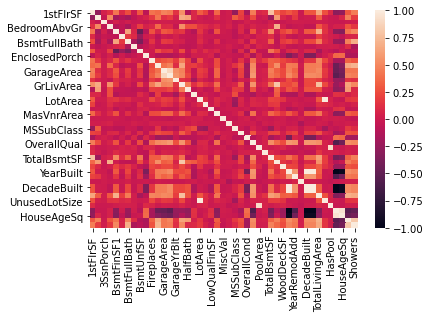

In [8]:
corrMatrix = housing[config.CONTINUOUS_VARIABLES].corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

In [7]:
np.logical_and(np.abs(housing[config.CONTINUOUS_VARIABLES].corr())>.25,housing[config.CONTINUOUS_VARIABLES].corr()<1).sum().sort_values()

MiscVal             0
YrSold              0
ScreenPorch         0
MoSold              0
LowQualFinSF        0
BsmtHalfBath        0
LotFrontage         0
BsmtFinSF2          0
3SsnPorch           0
PoolArea            1
HasPool             1
MSSubClass          3
KitchenAbvGr        3
UnusedLotSize       3
GarageYrBlt         4
WoodDeckSF          4
LotArea             4
EnclosedPorch       5
OverallCond         5
OpenPorchSF         6
BsmtUnfSF           7
BsmtFullBath        7
BedroomAbvGr        8
2ndFlrSF            9
Fireplaces         11
HalfBath           11
YearRemodAdd       14
MasVnrArea         17
TotRmsAbvGrd       17
BsmtFinSF1         17
GrLivArea          18
DecadeBuilt        18
DecadeRemodel      18
HouseAgeSq         19
YearBuilt          19
HouseAge           19
GarageArea         20
GarageCars         20
TotalBsmtSF        21
FullBath           21
Showers            22
OverallQual        24
1stFlrSF           24
Toilets            25
TotalLivingArea    27
dtype: int

In [ ]:
housing[['TotalLivingArea','Toilets','Showers','OverallQual']]

In [13]:
housing['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     92
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [14]:
housing['Neighborhood'].count()

2579